In [34]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import glob
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import cmocean.cm as cmo

In [2]:
from multiprocessing import Pool
from itertools import product
from itertools import starmap

def mask_insignificant(data1, data2):
    
    mode1 = np.where(np.sqrt(data1*data1+data2*data2) >= 1 , data1, np.NaN )
    mode2 = np.where(np.sqrt(data1*data1+data2*data2) >= 1, data2, np.NaN )
    
    return mode1, mode2


def grid_mask(m):
    
    mode = mask_insignificant(x[m], y[m])
    
    return mode

In [3]:
# np.count_nonzero(t310_s5==1)
# # np.nanmax()

In [4]:
# get dataset for SLP and surface wind at ly1
length=6 # -5,....0 year
ly = -1
variable = 'wind_sig'
block_length=2

data_x = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_windx_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)  # unit: m/s
data_y = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_windy_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)

reg_x = data_x['corr']
reg_y = data_y['corr']
reg_x_s = data_x['sig']
reg_y_s = data_y['sig']
lon = reg_x.lon
lat = reg_x.lat
data_reg = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_psl_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc")
psl1 = data_reg['corr']/100  # change the unit to hPa
psl_s1 = data_reg['sig']

x = reg_x.stack(spatial=('lat','lon'))
y = reg_y.stack(spatial=('lat','lon'))
sig_x = reg_x_s.stack(spatial=('lat','lon'))
sig_y = reg_y_s.stack(spatial=('lat','lon'))
spatial = x.coords["spatial"]

res = Pool().map(grid_mask,np.arange(0,x.shape[0],1))
re = np.array(res)
# output 
reg_u1 = xr.DataArray(re[:,0], dims = ["spatial"], coords = {"spatial":spatial}).unstack()    
reg_v1 = xr.DataArray(re[:,1], dims = ["spatial"], coords = {"spatial":spatial}).unstack()    

In [5]:
# get dataset for SLP and surface wind at ly0
length=6 # -5,....0 year
ly = 0
variable = 'wind_sig'
block_length=2

data_x = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_windx_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)  # unit: m/s
data_y = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_windy_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)

reg_x = data_x['corr']
reg_y = data_y['corr']
reg_x_s = data_x['sig']
reg_y_s = data_y['sig']

data_reg = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_psl_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc")
psl = data_reg['corr']/100  # change the unit to hPa
psl_s = data_reg['sig']

x = reg_x.stack(spatial=('lat','lon'))
y = reg_y.stack(spatial=('lat','lon'))
sig_x = reg_x_s.stack(spatial=('lat','lon'))
sig_y = reg_y_s.stack(spatial=('lat','lon'))
spatial = x.coords["spatial"]

res = Pool().map(grid_mask,np.arange(0,x.shape[0],1))
re = np.array(res)
# output 
reg_u = xr.DataArray(re[:,0], dims = ["spatial"], coords = {"spatial":spatial}).unstack()    
reg_v = xr.DataArray(re[:,1], dims = ["spatial"], coords = {"spatial":spatial}).unstack()    

In [6]:
# get dataset for Turbulent flux  at -1yr
length=6 # -5,....0 year
ly = -1
variable = 'tflux'
block_length=2

data = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_"+variable+"_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)  # unit: m/s

tflux1 = data['corr']
tflux_s1 = data['sig']



In [7]:
# get dataset for Turbulent flux at 0yr
length=6 # -5,....0 year
ly = 0
variable = 'tflux'
block_length=2

data = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_"+variable+"_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)  # unit: m/s

tflux = data['corr']
tflux_s = data['sig']


In [8]:
# get dataset for ssh and transport at ly1
length=6 # -5,....0 year
ly = -1

block_length=2
lat_min, lat_max = (60,90) #
lon_min, lon_max = (-80,70)


data_x = xr.open_dataset("/work/uo1075/u241321/data/reg_transx_T_c2_44_mask.nc", decode_times=False)  # unit: m/s
data_y = xr.open_dataset("/work/uo1075/u241321/data/reg_transy_T_c2_44_mask.nc", decode_times=False)

reg_transx1 = data_x['__xarray_dataarray_variable__'][length+ly-1,:,:].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
reg_transy1 = data_y['__xarray_dataarray_variable__'][length+ly-1,:,:].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# lon = reg_x.lon
# lat = reg_x.lat
data_reg = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_ssh_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc")
ssh1 = data_reg['corr']  # 
ssh_s1 = data_reg['sig']



In [36]:
np.max(reg_transx1)

<xarray.DataArray '__xarray_dataarray_variable__' ()>
array(2.73644126e+13)
Coordinates:
    mode     int64 5

In [37]:
np.max(reg_transy1)

<xarray.DataArray '__xarray_dataarray_variable__' ()>
array(3.81219169e+13)
Coordinates:
    mode     int64 5

In [9]:
# get dataset for ssh and transport at ly0
length=6 # -5,....0 year
ly = 0

block_length=2

data_x = xr.open_dataset("/work/uo1075/u241321/data/reg_transx_T_c2_44_mask.nc", decode_times=False)  # unit: m/s
data_y = xr.open_dataset("/work/uo1075/u241321/data/reg_transy_T_c2_44_mask.nc", decode_times=False)

reg_transx = data_x['__xarray_dataarray_variable__'][length+ly-1,:,:].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
reg_transy = data_y['__xarray_dataarray_variable__'][length+ly-1,:,:].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# lon = reg_x.lon
# lat = reg_x.lat
data_reg = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_ssh_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc")
ssh = data_reg['corr']  # 
ssh_s = data_reg['sig']



In [10]:
# get dataset for temperature at 0 yr
length=6 # -5,....0 year
ly = 0
variable = 't310'
block_length=2

data = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_"+variable+"_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)  # unit: m/s

t = data['corr']
t_s = data['sig']



In [11]:
# get dataset for temperature at -1 yr
length=6 # -5,....0 year
ly = -1
variable = 't310'
block_length=2

data = xr.open_dataset("/work/uo1075/u241321/data/boot_reg_"+variable+"_ly"+str(-ly)+"_block"+str(block_length)+"_new.nc", decode_times=False)  # unit: m/s

t1 = data['corr']
t_s1 = data['sig']



/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: linewidths is ignored by contourf
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle vi

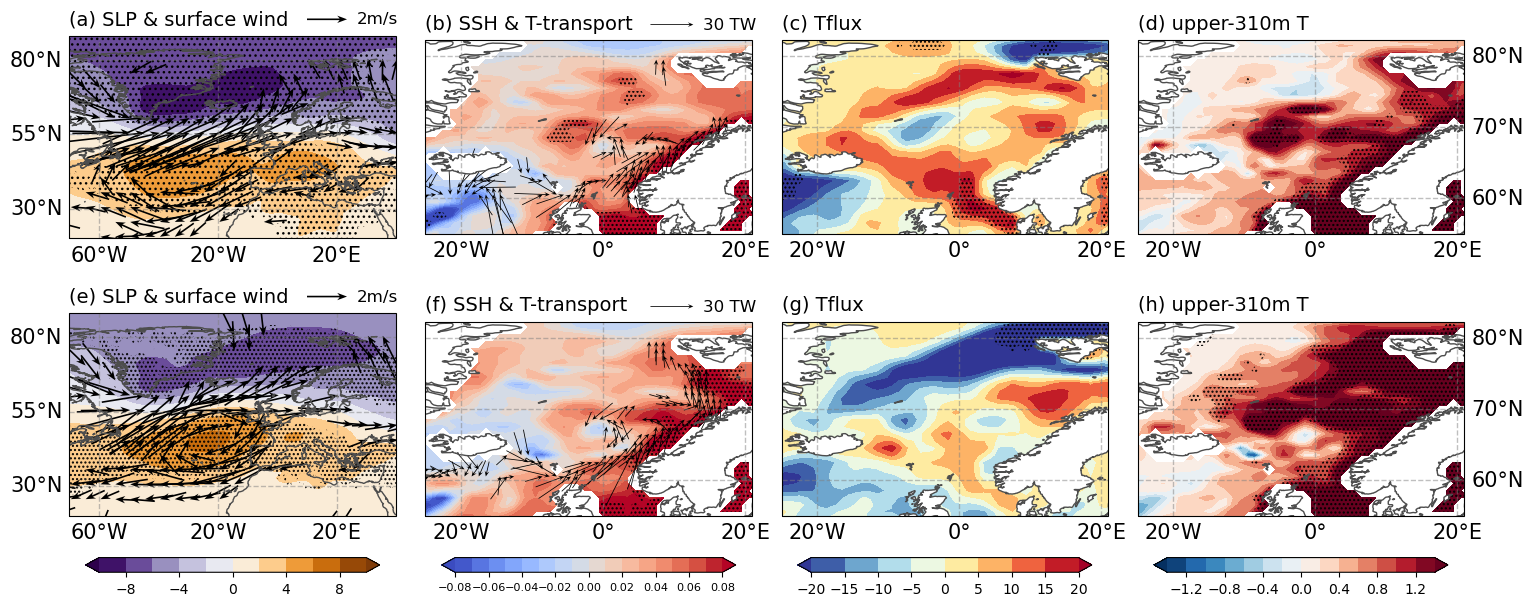

In [56]:
#-- Create the figure
minlat=20
maxlat=87
minlon=-70
maxlon=40

minlat1=55
maxlat1=82
minlon1=-25
maxlon1=21

labelsize = 15
xlable = [-60, -20, 20]
ylable = [30,55,80]

xlable1 = [-20, 0, 20]
ylable1 = [60,70,80]

title = ["(a) SLP & surface wind","(e) SLP & surface wind","(c) Tflux", "(g) Tflux",
        "(b) SSH & T-transport","(f) SSH & T-transport", "(d) upper-310m T","(h) upper-310m T"]
titlesize = 14
titlepad = 8

projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(18, 8), constrained_layout=False)

#-- Define space for the four plots
gs = fig.add_gridspec(nrows=2, ncols=4, hspace=0.05, wspace=0.09)

#-- Generate the subplots
ax1 = plt.subplot(gs[0, 0], projection=projection)
ax2 = plt.subplot(gs[1, 0], projection=projection)
ax3 = plt.subplot(gs[0, 2], projection=projection)
ax4 = plt.subplot(gs[1, 2], projection=projection)
ax5 = plt.subplot(gs[0, 1], projection=projection)
ax6 = plt.subplot(gs[1, 1], projection=projection)
ax7 = plt.subplot(gs[0, 3], projection=projection)
ax8 = plt.subplot(gs[1, 3], projection=projection)

################################################################################################
# plot 1: SLP and surface wind at -1yr
################################################################################################

# p1 = ssh[0].plot.contourf(ax=ax1, x='lon', y='lat',levels = np.arange(-6, 7, 1),  
#                               cmap='RdBu_r',
#                               extend = 'both', add_colorbar=False, add_labels=False)
plot = ax1.contourf(lon, lat, psl1, levels = np.arange(-10, 12, 2),  
                              cmap='PuOr_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax1.contourf(lon, lat, abs(psl_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '...', None], linewidths=0.01,
                      colors="none", 
                      transform=ccrs.PlateCarree())


vplot = ax1.quiver( lon[::5], lat[::5], reg_u1 [::5,::5], reg_v1[::5,::5], width = 0.005, headwidth = 4.5, headlength = 6,pivot = 'tip',scale = 5, scale_units = 'inches')  # ,
ax1.quiverkey(vplot, 0.85, 1.08, 2, "2m/s",labelpos='E', coordinates='axes', fontproperties={'size': 12,'family':'Times New Roman'})

# plt.colorbar(plot, ax=ax1, shrink=0.9, pad=0.14, orientation='horizontal')

# ax=ax1
#ax.coastlines()
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='none'))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax1.set_extent([minlon,maxlon,minlat,maxlat])
gl.xlocator = mticker.FixedLocator(xlable)
gl.ylocator = mticker.FixedLocator(ylable)
gl.xlabels_top=False
gl.ylabels_right=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
ax1.set_title(title[0],size = titlesize, loc = 'left', pad = titlepad)
################################################################################################
# plot 2: SLP and surface wind at 0yr
################################################################################################
 
plot = ax2.contourf(lon, lat, psl, levels = np.arange(-10, 12, 2),  
                              cmap='PuOr_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax2.contourf(lon, lat, abs(psl_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())

vplot = ax2.quiver( lon[::5], lat[::5], reg_u[::5,::5], reg_v[::5,::5], width = 0.005, headwidth = 4.5, headlength = 6,pivot = 'tip',scale = 5, scale_units = 'inches')  # ,
ax1.quiverkey(vplot, 0.85, 1.08, 2, "2m/s",labelpos='E', coordinates='axes', fontproperties={'size': 12,'family':'Times New Roman'})


ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='none'))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')


gl.xlines = True
gl.ylines = True
ax2.set_extent([minlon,maxlon,minlat,maxlat])
gl.xlocator = mticker.FixedLocator(xlable)
gl.ylocator = mticker.FixedLocator(ylable) #([30,60],180)
gl.xlabels_top=False
gl.ylabels_right=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax2, shrink=0.9, pad=0.14, orientation='horizontal')
ax2.set_title(title[1],size = titlesize, loc = 'left', pad = titlepad)

################################################################################################
# plot 3: Turbulent flux and zonal wind stress at -1yr
################################################################################################
 
plot = ax3.contourf(tflux1.lon, tflux1.lat, tflux1, levels = np.arange(-20, 25, 5), 
                              cmap= 'RdYlBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax3.contourf(tflux_s1.lon, tflux_s1.lat, abs(tflux_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())



ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax3.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) #([30,60],180)
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
# plt.colorbar(plot, ax=ax3, shrink=0.9, pad=0.14, orientation='horizontal')
ax3.set_title(title[2],size = titlesize, loc = 'left', pad = titlepad)
    

################################################################################################
# plot 4: Turbulent flux at 0yr
################################################################################################
 
plot = ax4.contourf(tflux.lon, tflux.lat, tflux, levels = np.arange(-20, 25, 5), 
                              cmap= 'RdYlBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax4.contourf(tflux_s.lon, tflux_s.lat, abs(tflux_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax4.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax4, shrink=0.9, pad=0.14, orientation='horizontal')
ax4.set_title(title[3],size = titlesize, loc = 'left', pad = titlepad)

################################################################################################
# plot 5: ssh and heat transport at -1yr
################################################################################################

# p1 = ssh[0].plot.contourf(ax=ax1, x='lon', y='lat',levels = np.arange(-6, 7, 1),  
#                               cmap='RdBu_r',
#                               extend = 'both', add_colorbar=False, add_labels=False)
plot = ax5.contourf(ssh1.lon, ssh1.lat, ssh1, levels = np.arange(-0.08, 0.09, 0.01),  
                              cmap='coolwarm',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax5.contourf(ssh1.lon, ssh1.lat, abs(ssh_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


vplot = ax5.quiver( reg_transx1.lon, reg_transx1.lat, reg_transx1/1000000000000. , reg_transy1/1000000000000., headwidth = 6, headlength = 7,pivot = 'tip', scale = 70, scale_units = 'inches')  # ,
ax5.quiverkey(vplot, 0.82, 1.08, 30, "30 TW",labelpos='E', coordinates='axes', fontproperties={'size': 12,'family':'Times New Roman'})

# cbar = plt.colorbar(plot, ax=ax5, shrink=0.9, pad=0.14, orientation='horizontal')
# cbar.ax.tick_params(labelsize=7)

# ax=ax1
#ax.coastlines()
ax5.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax5.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
ax5.set_title(title[4],size = titlesize, loc = 'left', pad = titlepad)
    
################################################################################################
# plot 6: ssh and heat transport at 0yr
################################################################################################

plot = ax6.contourf(ssh.lon, ssh.lat, ssh, levels = np.arange(-0.08, 0.09, 0.01),  
                              cmap='coolwarm',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax6.contourf(ssh.lon, ssh.lat, abs(ssh_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


vplot = ax6.quiver( reg_transx.lon, reg_transx.lat, reg_transx/1000000000000. , reg_transy/1000000000000., headwidth = 6, headlength = 7,pivot = 'tip', scale = 70, scale_units = 'inches')  # ,
ax6.quiverkey(vplot, 0.82, 1.08, 30, "30 TW",labelpos='E', coordinates='axes', fontproperties={'size': 12,'family':'Times New Roman'})

# scale: Scales the length of the arrow inversely..Number of data units per arrow length unit, e.g., m/s per plot width; a smaller scale parameter makes the arrow longer.
# scale_units: If the scale kwarg is None, the arrow length unit. Default is None.
# e.g. scale_units is 'inches', scale is 2.0, and (u, v) = (1, 0), then the vector will be 0.5 inches long.


ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax6.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
cbar = plt.colorbar(plot, ax=ax6, shrink=0.9, pad=0.14, orientation='horizontal')
cbar.ax.tick_params(labelsize=8.1)
ax6.set_title(title[5],size = titlesize, loc = 'left', pad = titlepad)

################################################################################################
# plot 7: T at -1 yr
################################################################################################
 
plot = ax7.contourf(t1.lon, t1.lat, t1, np.arange(-1.4, 1.6, 0.2), 
                              cmap='RdBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax7.contourf(t_s1.lon, t_s1.lat, abs(t_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


ax7.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax7.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax7.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
# gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
# plt.colorbar(plot, ax=ax7, shrink=0.9, pad=0.14, orientation='horizontal')
ax7.set_title(title[6],size = titlesize, loc = 'left', pad = titlepad)


################################################################################################
# plot 8: T at 0 yr
################################################################################################
 
plot = ax8.contourf(t.lon, t.lat, t, np.arange(-1.4, 1.6, 0.2), 
                              cmap='RdBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax8.contourf(t_s.lon, t_s.lat, abs(t_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


ax8.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax8.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax8.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
# gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax8, shrink=0.9, pad=0.14, orientation='horizontal')
ax8.set_title(title[7],size = titlesize, loc = 'left', pad = titlepad)


fig.savefig('/work/uo1075/u241321/results/p5_transient_new.pdf')    

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: linewidths is ignored by contourf
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle vi

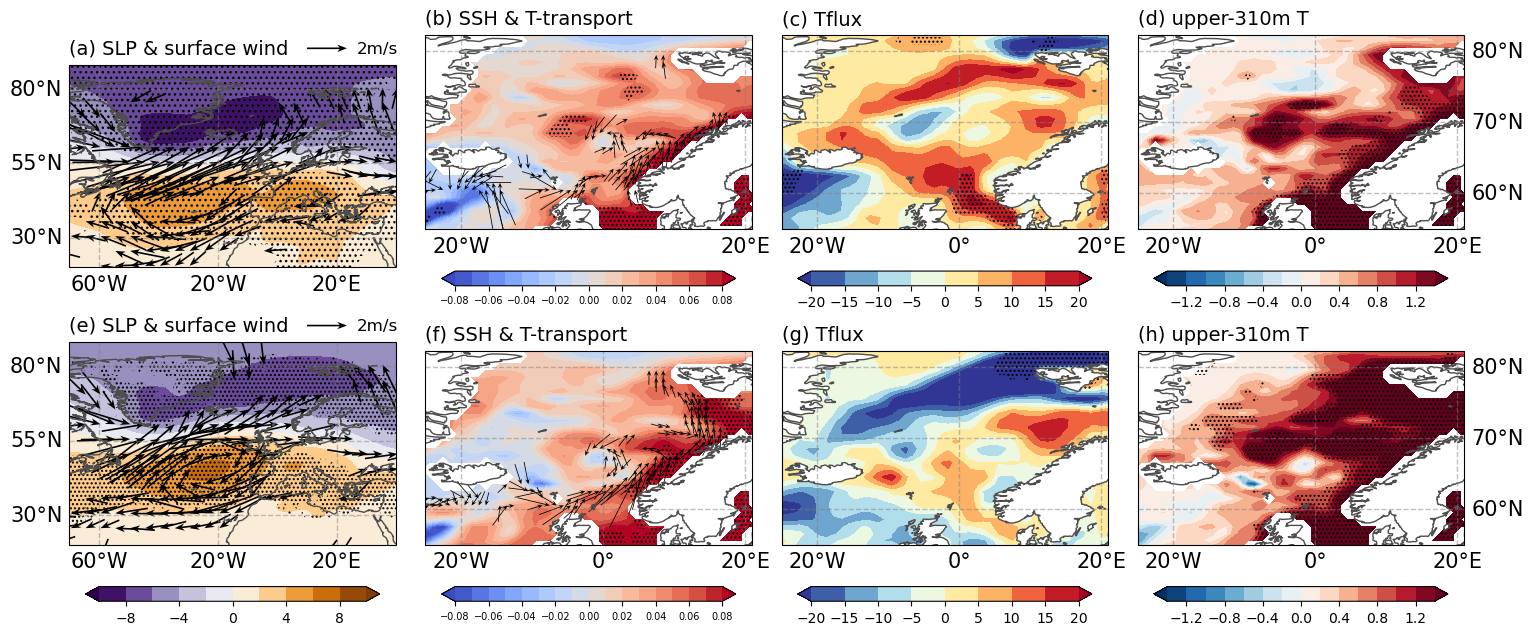

In [18]:
#-- Create the figure
minlat=20
maxlat=87
minlon=-70
maxlon=40

minlat1=55
maxlat1=82
minlon1=-25
maxlon1=21

labelsize = 15
xlable = [-60, -20, 20]
ylable = [30,55,80]

xlable1 = [-20, 0, 20]
ylable1 = [60,70,80]

title = ["(a) SLP & surface wind","(e) SLP & surface wind","(c) Tflux", "(g) Tflux",
        "(b) SSH & T-transport","(f) SSH & T-transport", "(d) upper-310m T","(h) upper-310m T"]
titlesize = 14
titlepad = 8

projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(18, 8), constrained_layout=False)

#-- Define space for the four plots
gs = fig.add_gridspec(nrows=2, ncols=4, hspace=0.05, wspace=0.09)

#-- Generate the subplots
ax1 = plt.subplot(gs[0, 0], projection=projection)
ax2 = plt.subplot(gs[1, 0], projection=projection)
ax3 = plt.subplot(gs[0, 2], projection=projection)
ax4 = plt.subplot(gs[1, 2], projection=projection)
ax5 = plt.subplot(gs[0, 1], projection=projection)
ax6 = plt.subplot(gs[1, 1], projection=projection)
ax7 = plt.subplot(gs[0, 3], projection=projection)
ax8 = plt.subplot(gs[1, 3], projection=projection)

################################################################################################
# plot 1: SLP and surface wind at -1yr
################################################################################################

# p1 = ssh[0].plot.contourf(ax=ax1, x='lon', y='lat',levels = np.arange(-6, 7, 1),  
#                               cmap='RdBu_r',
#                               extend = 'both', add_colorbar=False, add_labels=False)
plot = ax1.contourf(lon, lat, psl1, levels = np.arange(-10, 12, 2),  
                              cmap='PuOr_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax1.contourf(lon, lat, abs(psl_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '...', None], linewidths=0.01,
                      colors="none", 
                      transform=ccrs.PlateCarree())


vplot = ax1.quiver( lon[::5], lat[::5], reg_u1 [::5,::5], reg_v1[::5,::5], width = 0.005, headwidth = 4.5, headlength = 6,pivot = 'tip',scale = 5, scale_units = 'inches')  # ,
ax1.quiverkey(vplot, 0.85, 1.08, 2, "2m/s",labelpos='E', coordinates='axes', fontproperties={'size': 12,'family':'Times New Roman'})

# plt.colorbar(plot, ax=ax1, shrink=0.9, pad=0.14, orientation='horizontal')

# ax=ax1
#ax.coastlines()
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='none'))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax1.set_extent([minlon,maxlon,minlat,maxlat])
gl.xlocator = mticker.FixedLocator(xlable)
gl.ylocator = mticker.FixedLocator(ylable)
gl.xlabels_top=False
gl.ylabels_right=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
ax1.set_title(title[0],size = titlesize, loc = 'left', pad = titlepad)
################################################################################################
# plot 2: SLP and surface wind at 0yr
################################################################################################
 
plot = ax2.contourf(lon, lat, psl, levels = np.arange(-10, 12, 2),  
                              cmap='PuOr_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax2.contourf(lon, lat, abs(psl_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())

vplot = ax2.quiver( lon[::5], lat[::5], reg_u[::5,::5], reg_v[::5,::5], width = 0.005, headwidth = 4.5, headlength = 6,pivot = 'tip',scale = 5, scale_units = 'inches')  # ,
ax1.quiverkey(vplot, 0.85, 1.08, 2, "2m/s",labelpos='E', coordinates='axes', fontproperties={'size': 12,'family':'Times New Roman'})


ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='none'))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')


gl.xlines = True
gl.ylines = True
ax2.set_extent([minlon,maxlon,minlat,maxlat])
gl.xlocator = mticker.FixedLocator(xlable)
gl.ylocator = mticker.FixedLocator(ylable) #([30,60],180)
gl.xlabels_top=False
gl.ylabels_right=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax2, shrink=0.9, pad=0.14, orientation='horizontal')
ax2.set_title(title[1],size = titlesize, loc = 'left', pad = titlepad)

################################################################################################
# plot 3: Turbulent flux and zonal wind stress at -1yr
################################################################################################
 
plot = ax3.contourf(tflux1.lon, tflux1.lat, tflux1, levels = np.arange(-20, 25, 5), 
                              cmap= 'RdYlBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax3.contourf(tflux_s1.lon, tflux_s1.lat, abs(tflux_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())



ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax3.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) #([30,60],180)
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax3, shrink=0.9, pad=0.14, orientation='horizontal')
ax3.set_title(title[2],size = titlesize, loc = 'left', pad = titlepad)
    

################################################################################################
# plot 4: Turbulent flux at 0yr
################################################################################################
 
plot = ax4.contourf(tflux.lon, tflux.lat, tflux, levels = np.arange(-20, 25, 5), 
                              cmap= 'RdYlBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax4.contourf(tflux_s.lon, tflux_s.lat, abs(tflux_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax4.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax4, shrink=0.9, pad=0.14, orientation='horizontal')
ax4.set_title(title[3],size = titlesize, loc = 'left', pad = titlepad)

################################################################################################
# plot 5: ssh and heat transport at -1yr
################################################################################################

# p1 = ssh[0].plot.contourf(ax=ax1, x='lon', y='lat',levels = np.arange(-6, 7, 1),  
#                               cmap='RdBu_r',
#                               extend = 'both', add_colorbar=False, add_labels=False)
plot = ax5.contourf(ssh1.lon, ssh1.lat, ssh1, levels = np.arange(-0.08, 0.09, 0.01),  
                              cmap='coolwarm',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax5.contourf(ssh1.lon, ssh1.lat, abs(ssh_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


vplot = ax5.quiver( reg_transx1.lon, reg_transx1.lat, reg_transx1 , reg_transy1, headwidth = 6, headlength = 7,pivot = 'tip', scale = 80000000000000, scale_units = 'inches')  # ,

cbar = plt.colorbar(plot, ax=ax5, shrink=0.9, pad=0.14, orientation='horizontal')
cbar.ax.tick_params(labelsize=7)

# ax=ax1
#ax.coastlines()
ax5.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax5.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlocator = mticker.FixedLocator(xlable)
gl.ylocator = mticker.FixedLocator(ylable)
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
ax5.set_title(title[4],size = titlesize, loc = 'left', pad = titlepad)
    
################################################################################################
# plot 6: ssh and heat transport at 0yr
################################################################################################

plot = ax6.contourf(ssh.lon, ssh.lat, ssh, levels = np.arange(-0.08, 0.09, 0.01),  
                              cmap='coolwarm',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax6.contourf(ssh.lon, ssh.lat, abs(ssh_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


vplot = ax6.quiver( reg_transx.lon, reg_transx.lat, reg_transx , reg_transy, headwidth = 6, headlength = 7,pivot = 'tip', scale = 80000000000000, scale_units = 'inches')  # ,
# scale: Scales the length of the arrow inversely..Number of data units per arrow length unit, e.g., m/s per plot width; a smaller scale parameter makes the arrow longer.
# scale_units: If the scale kwarg is None, the arrow length unit. Default is None.
# e.g. scale_units is 'inches', scale is 2.0, and (u, v) = (1, 0), then the vector will be 0.5 inches long.


ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax6.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
cbar = plt.colorbar(plot, ax=ax6, shrink=0.9, pad=0.14, orientation='horizontal')
cbar.ax.tick_params(labelsize=7)
ax6.set_title(title[5],size = titlesize, loc = 'left', pad = titlepad)

################################################################################################
# plot 7: T at -1 yr
################################################################################################
 
plot = ax7.contourf(t1.lon, t1.lat, t1, np.arange(-1.4, 1.6, 0.2), 
                              cmap='RdBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax7.contourf(t_s1.lon, t_s1.lat, abs(t_s1),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


ax7.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax7.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax7.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
# gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax7, shrink=0.9, pad=0.14, orientation='horizontal')
ax7.set_title(title[6],size = titlesize, loc = 'left', pad = titlepad)


################################################################################################
# plot 8: T at 0 yr
################################################################################################
 
plot = ax8.contourf(t.lon, t.lat, t, np.arange(-1.4, 1.6, 0.2), 
                              cmap='RdBu_r',
                              extend = 'both', add_colorbar=False, add_labels=False)

plot_s = ax8.contourf(t_s.lon, t_s.lat, abs(t_s),
                      [0, 0.5, 1.1],
                      hatches=[None, '....', None], linewidths=0.5,
                      colors="none", 
                      transform=ccrs.PlateCarree())


ax8.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='1'))
gl = ax8.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax8.set_extent([minlon1,maxlon1,minlat1,maxlat1])
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(xlable1)
gl.ylocator = mticker.FixedLocator(ylable1) 
gl.xlabels_top=False
# gl.ylabels_right=False
gl.ylabels_left=False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': labelsize, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':labelsize,'rotation':0}
plt.colorbar(plot, ax=ax8, shrink=0.9, pad=0.14, orientation='horizontal')
ax8.set_title(title[7],size = titlesize, loc = 'left', pad = titlepad)


fig.savefig('/work/uo1075/u241321/results/p5_transient_new.pdf')    